# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

#### Libraries

In [ ]:
!pip3 install statsmodels
!pip3 install sklearn
!pip3 install scikit-learn
!pip3 install cython

In [27]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

import pandas as pd
import numpy as np

In [28]:
# Librerías de modelado
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [29]:
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

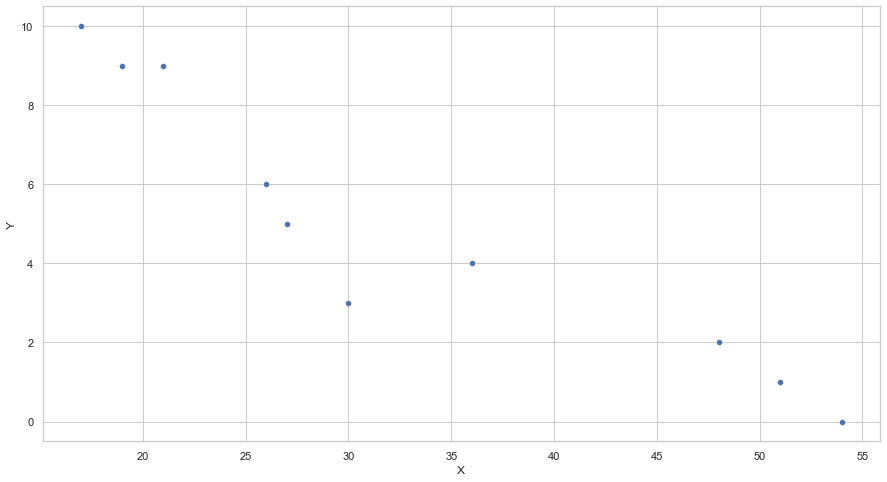

In [30]:
sns.scatterplot(x=student_data["X"], y=student_data["Y"]);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

There is a relation between the two variables: the younger you are, the more likely you will be late

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [31]:
student_data[["X", "Y"]].cov()

,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


In [32]:
student_data[["X", "Y"]].corr()

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


The covariance is the mean value of the product of the deviations of two variates from their respective means and the correlation indicates the way the variabes are related (-1, 1). In this case the variables have a negative relation and that the slope is decreasing.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [33]:
lr = LinearRegression()
lr.fit(
    X = student_data[["X"]],
    y = student_data.Y 
)

LinearRegression()

In [34]:
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
print(beta_1, beta_0)

-0.2428207709159808 12.888803363135768


In [35]:
student_data["prediccion"] = (student_data.X * beta_1) + beta_0

Plot your regression model on your scatter plot.

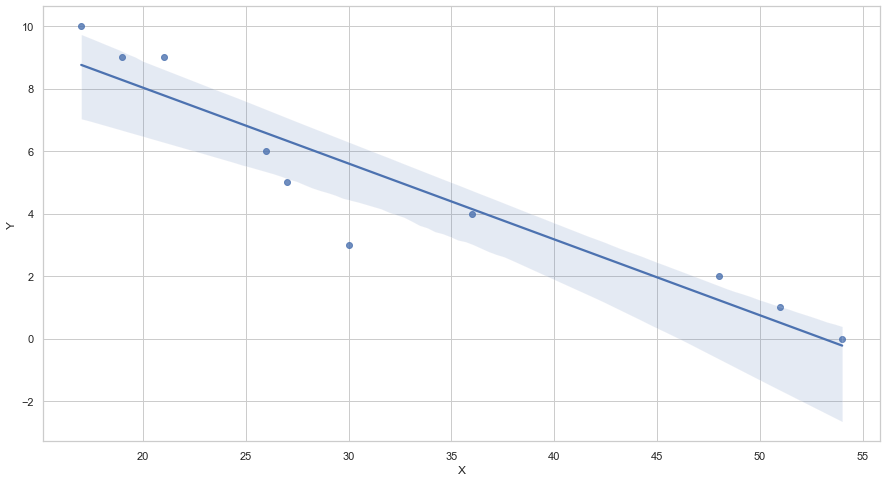

In [36]:
sns.regplot(x="X", y="Y", data=student_data);

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

As the correlation is very close to -1, I would say that age is a good predictor of tardiness. We can also see in the graph that the values from the model al similar to the first ones.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [37]:
veh_df = pd.read_csv("vehicles.csv")
veh_df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [38]:
veh_df2 = veh_df[["Year","Cylinders","Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", 'CO2 Emission Grams/Mile']]
veh_df2.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [42]:
veh_df2.rename(columns = {'Fuel Barrels/Year': 'FuelBarrelsYear', 'Combined MPG': 'CombinedMPG', 'Fuel Cost/Year': 'FuelCostYear', 'CO2 Emission Grams/Mile': 'CO2EmissionGramsMile'}, inplace=True)
result = smf.ols("CO2EmissionGramsMile ~ Year + Cylinders + FuelCostYear + CombinedMPG + FuelBarrelsYear ", data=veh_df2).fit()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [40]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     CO2EmissionGramsMile   R-squared:                       0.981
Model:                              OLS   Adj. R-squared:                  0.981
Method:                   Least Squares   F-statistic:                 3.687e+05
Date:                  Wed, 24 Nov 2021   Prob (F-statistic):               0.00
Time:                          10:39:51   Log-Likelihood:            -1.5173e+05
No. Observations:                 35952   AIC:                         3.035e+05
Df Residuals:                     35946   BIC:                         3.035e+05
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         769.8883     19.392     39.702      0.000     731.880     807.897
Year               -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders           1.8788      0.083     22.598      0.000       1.716       2.042
FuelCostYear        0.0323      0.000     67.025      0.000       0.031       0.033
CombinedMPG        -3.0404      0.042    -71.645      0.000      -3.124      -2.957
FuelBarrelsYear    19.0529      0.061    311.600      0.000      18.933      19.173
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd
from selenium.webdriver.support.ui import Select
from webdriver_manager.chrome import ChromeDriverManager